In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')
from discretised.trainer import DiscretisedBFNTrainer
# 150e3a3656bc3e6c76366ee98da5b0fd9f7c16ea
trainer = DiscretisedBFNTrainer(wandb_project_name=None)
# trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [11]:
import torch
from datasets.utils import get_image_grid_from_tensor
model = trainer.bfn_model
model.eval()

# Generate samples and priors
samples, priors = model.sample_generation_for_discretised_data(n_steps=5)
samples = samples.to(torch.float32)


In [32]:
samples = samples.transpose(1, 3)
image_grid = get_image_grid_from_tensor(samples)
# Convert samples and priors to numpy arrays
image_grid = image_grid.detach().numpy()
priors_np = priors.detach().numpy()

In [33]:
print(samples.shape, image_grid.shape)

torch.Size([8, 3, 32, 32]) (3, 274, 36)


In [34]:
import wandb
import numpy as np
wandb.init(project="bayesian_flow")
image_grid = np.transpose(image_grid, (2, 1, 0))
print(image_grid.shape)
images = wandb.Image(image_grid, caption="CIFAR10 - Sampled Images from BFN")
wandb.log({"image_samples": images})

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


(36, 274, 3)


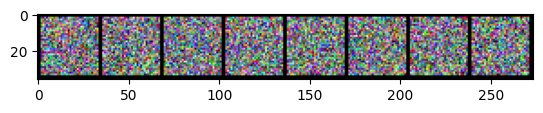

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# Image.fromarray(image_grid)
plt.imshow()

In [ ]:
import torch
import torch.distributions as dist

d=8
bs=32
mu_x = torch.zeros((bs, d))
sigma_x = torch.ones((bs, d))
normal_dist = dist.Normal(mu_x, sigma_x)

k_lower = torch.linspace(-3, 3, 16)
k_lower_broadcasted = k_lower.repeat(d, bs, 1).transpose(0, 2)
# print(k_lower_broadcasted)
print(k_lower_broadcasted.shape)
correct_shape = torch.ones((16, bs, d))
cdf_values_lower = normal_dist.cdf(k_lower_broadcasted).permute(1, 2, 0)
print(cdf_values_lower.shape)
print(cdf_values_lower[0, 0, :])

In [ ]:
from datasets.cifar_10 import get_cifar10_dataloaders
k = 16
train_dls, val_dls, test_dls = get_cifar10_dataloaders(batch_size=32, num_bins=k)
print(len(train_dls), len(val_dls), len(test_dls))
import torch
from datasets.utils import plot_tensor_images
train_batch = next(iter(train_dls))
print(train_batch.shape)
plot_tensor_images(train_batch)
print(torch.max(train_batch), torch.min(train_batch), len(torch.unique(train_batch)))